In [1]:
import gensim
import pandas as pd

df = pd.read_csv('quotetags.csv')
df

,Tags,Author
0,"Albert Einstein,March,Germany,adulthood,succes...",Albert Einstein
1,"Marilyn Monroe,June,The United States,be-yours...",Marilyn Monroe
2,"J.K. Rowling,July,The United Kingdom,abilities...",J.K. Rowling
3,"Albert Einstein,March,Germany,change,deep-thou...",Albert Einstein
4,"Jane Austen,December,The United Kingdom,aliter...",Jane Austen
...,...,...
95,"Harper Lee,April,The United States,better-life...",Harper Lee
96,"Khaled Hosseini,March,Afghanistan,life",Khaled Hosseini
97,"J.M. Barrie,May,The United Kingdom,adventure,love",J.M. Barrie
98,"Jimi Hendrix,November,The United States,death,...",Jimi Hendrix


In [2]:
# prepare the data in the list of lists
# The data now is comma-delimited string
tag = [row.split(",")for row in df['Tags']]

In [3]:
# apply the model
model = gensim.models.Word2Vec(tag, min_count=1, vector_size=20, 
                               workers=3, window=3, sg=1)

In [4]:
# get item
model.wv.__getitem__('Albert Einstein') # 2D representation of Albert Einstein

array([-0.02776789,  0.00836551, -0.00406576,  0.03451859,  0.01988194,
        0.02259276,  0.0071109 , -0.01345244, -0.02218077, -0.00485056,
        0.00776846, -0.01369683, -0.03530609, -0.03932138, -0.0453657 ,
       -0.02985048, -0.00880505, -0.02126941, -0.03225451, -0.0193428 ],
      dtype=float32)

In [5]:
# find similarity
model.wv.similarity('Albert Einstein', 'Marilyn Monroe')

0.009445123

In [6]:
model.wv.most_similar('Mark Twain')[:5]

[('journey', 0.48219355940818787),
 ('beatles', 0.4768977463245392),
 ('novelist-quotes', 0.45920589566230774),
 ('inspiration', 0.4142414927482605),
 ('August', 0.4116699993610382)]

In [9]:
# visualization of the vectors using t-SNE to show high dimensional data
# t-distributed Stochastic Neighborhood Embedding

authors = df['Author'].unique().tolist() # in case multiple authors

from sklearn.manifold import TSNE

X = model.wv.__getitem__(authors)
tsne_model = TSNE(perplexity = 5, n_components =2, 
                  init="pca", n_iter=1000, random_state = 100 )
# perpelexity = number of neighbors
# n_components = number of dimensions (e.g 2D vs 3D)
# "pca" = principle component analysis

Y = tsne_model.fit_transform(X)


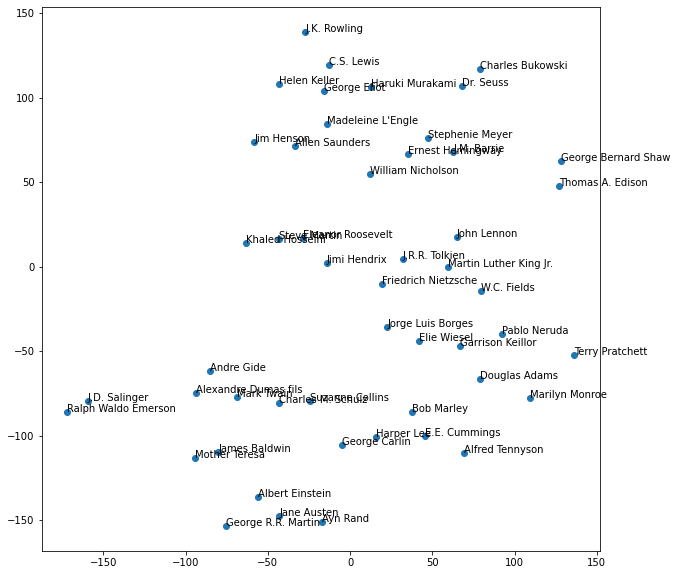

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y[:,0], Y[:,1])

for i, author in enumerate(authors):
    plt.annotate(author, xy=(Y[i,0], Y[i,1]))
    
plt.show()